In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.4'

In [89]:
def _scatter2d(data, x_d, y_d, n_clusters, _min=-2, _max=2, colors=None):
    plt.rcParams['figure.facecolor'] = '0.2'
    plt.axes().set_facecolor('black')
    x = data[:, x_d]
    y = data[:, y_d]
    
    if colors is None:
        colors = ['green'] * n_clusters
    
    for i in range(n_clusters):
        idx = data[:, -1] == i
        plt.scatter(x[idx], y[idx], c=colors[i])

    plt.xlabel(f"d{x_d}")
    plt.ylabel(f"d{y_d}")
    plt.xlim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    plt.ylim(data[:, x_d].min()+_max, data[:, x_d].max()+_max)
    plt.show()

In [85]:
def _scatter3d(data, x_d, y_d, z_d, n_clusters, _min=-.2, _max=.2, colors=None):
    fig = plt.figure()
    fig.patch.set_facecolor('0.2')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('0.2')
    x = data[:, x_d]
    y = data[:, y_d]
    z = data[:, z_d]
    
    if colors is None:
        colors = ['green'] * n_clusters
    
    for i in range(n_clusters):
        idx = data[:, -1] == i
        ax.scatter(x[idx], y[idx], z[idx], c=colors[i])
        
    ax.set_xlabel(f"d{x_d}")
    ax.set_ylabel(f"d{y_d}")
    ax.set_zlabel(f"d{z_d}")
    ax.set_xlim(data[:, x_d].min()+_min, data[:, x_d].max()+_max)
    ax.set_ylim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    ax.set_zlim(data[:, z_d].min()+_min, data[:, z_d].max()+_max)
    plt.show()

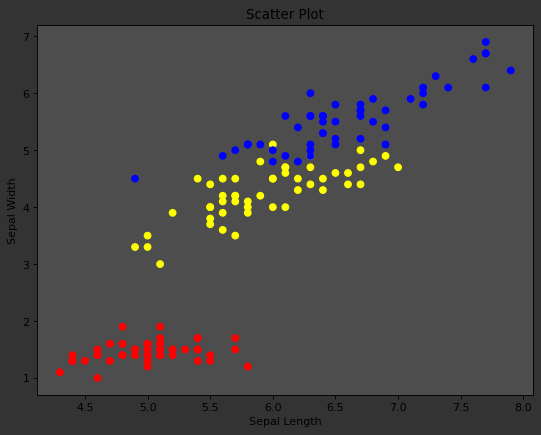

In [86]:
x1 = []
x2 = []
x3 = [] 
colors = []

iris_colors = {'Iris-setosa' : 'red',
               'Iris-versicolor' : 'yellow',
               'Iris-virginica' : 'blue'}

with open("iris.csv", "r") as fobj:
    for line in fobj:
        words = line.rstrip().split(",")
        if len(words) != 5:
            continue
        x1.append(float(words[0]))
        x2.append(float(words[1]))
        x3.append(float(words[2]))
        colors.append(iris_colors[words[4]])

plt.figure(figsize=(8, 6), dpi=80)
plt.axes().set_facecolor('0.3')        
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')
plt.scatter(np.array(x1), np.array(x3), color=colors)
plt.grid(False)
plt.show()

---------

In [74]:
df = pd.read_csv('iris.csv')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [76]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [77]:
_map = {'Iris-versicolor': 1,'Iris-virginica': 2,'Iris-setosa': 0}

#replace the values or add another column
#df['class'].replace(_map, inplace=True)
df['num_class'] = df['class'].map(_map)

In [78]:
df['num_class']

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: num_class, Length: 149, dtype: int64

In [79]:
np_data = df.values
np_data

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa', 0],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa', 0],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa', 0],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa', 0],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa', 0],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa', 0],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa', 0],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa', 0],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa', 0],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa', 0],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa', 0],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa', 0],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa', 0],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa', 0],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa', 0],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa', 0],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa', 0],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa', 0],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa', 0],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa', 0],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa', 0],
       [4.6, 

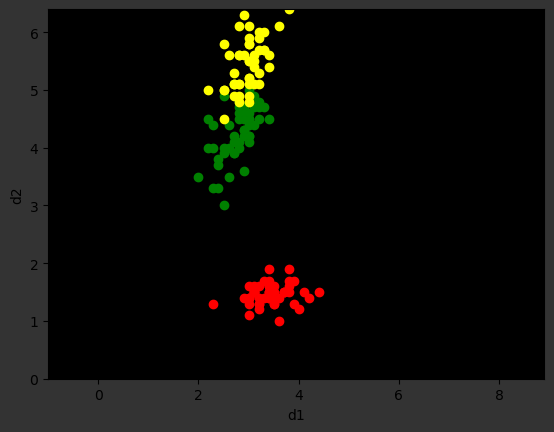

In [88]:
_scatter2d(np_data,1,2,3,colors=['red','green','yellow'])